In [1]:
%matplotlib inline
import os
from collections import Counter
import numpy as np
import pandas as pd

from scipy.stats import pearsonr

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

FILE_PATH = "/home/jingbozhou/Project/CombDrug/runAddMut/9-plot/rawData/"

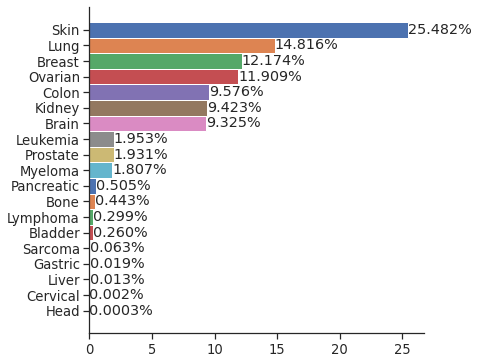

In [2]:
raw_data = pd.read_table(os.path.join(FILE_PATH, "all_comb_data.tsv"))

all_count_d = Counter(raw_data["primary_disease"].values)

all_count_d = {k: v for k, v in sorted(all_count_d.items(), key=lambda item: item[1], reverse=True)}
label_list, count_list = [], []
for key, value in all_count_d.items():
    label_list.append(key.split()[0])
    count_list.append(value/raw_data.shape[0]*100)
    
ylocs = np.arange(len(count_list))

sns.set(style="ticks", font_scale=1.2, rc={'figure.figsize':(6, 6)})
fig, ax = plt.subplots()

ax.barh(label_list, count_list, align='center', height=1,
        color=list(sns.color_palette()))
    
for x, y in zip(count_list, ylocs):
    if y == 18:
        ax.text(x, y, "{:.4f}%".format(x), va='center')
    else:
        ax.text(x, y, "{:.3f}%".format(x), va='center')
            
ax.invert_yaxis()

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

#plt.savefig("./plotFigure/cell_line_dis_per.svg", format="svg", bbox_inches="tight", transparent=True)